Medimos la caida de potencial sobre el capacitor. Conectamos la resistencia y el capacitor en serie. La resistencia la conectamos al generador de funciones y el capacitor al osciloscopio. Hicimos un barrido en frecuencias espaciadas logaritmicamente desde 10 Hz hasta 1000 Hz y medimos el pico de potencial en el capacitor, y para esto nos aseguramos de que en cada una de las mediciones la escala vertical y horizontal sean inversamente proporcionales a las frecuencias, y lo hicimos de tal modo de asegurarnos que entren 5 (cinco) oscilaciones para cada una de las frecuencias elegidas. Esto lo hicimos para el voltaje máximo en cada uno de los puntos, y para la función range que estaba en la clase, esto lo hicimos para  comprobar que ambos resultados son identicos. 

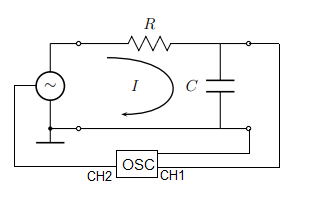


Importamos los datos de las freciencias utilizadas y los datos de voltaje que medimos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

%matplotlib widget

frec = np.loadtxt("frecs.txt", delimiter=",")
datos_range = np.loadtxt("datos_range.txt", delimiter=",")
datos_max = np.loadtxt("datos_max.txt", delimiter=",")

graficamos y ajustamos los datos  por $T = \frac{1}{\sqrt{1+(\omega / \omega_0)^2}}$

In [3]:
def ajuste(x, wo):
    x = 2*np.pi*x
    return 1/np.sqrt(1+(x/wo)**2)

popt, pcov =  curve_fit(ajuste, frec, datos_range, p0 = 175)
x_varios = np.linspace(np.log10(10), 1000,1000)

plt.figure()
plt.plot(frec, datos_range, '-o',label = 'max')
plt.plot(x_varios, ajuste(x_varios, popt), 'r-')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Transferencia')
plt.show()
1/popt, pcov

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(array([0.01241708]), array([[15.10680766]]))

Como parametro de ajuste obtuvimos que $\omega_0 = 80.5$ y el tiempo caracteristico $\tau = RC$ se obtiene como $RC = \frac{1}{\omega_0} = 0.0124$ ms